In [30]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LogNorm
os.chdir('/Users/walu/lle_25/RE03/build')

In [39]:


def process_dose_file(input_txt_file, overlay_image="detector_overlay.png"):
    # Extract particle name from file name
    base = os.path.basename(input_txt_file)
    particle = base.replace("dDep", "").replace(".txt", "")

    # Convert txt to CSV
    csv_file = input_txt_file.replace(".txt", ".csv")
    convert_to_csv(input_txt_file, csv_file)

    # Load the CSV into DataFrame
    df = pd.read_csv(csv_file)

    # --- Z-profile plot ---
    dose_per_z = df.groupby('iZ')['dose'].sum()
    z_cm = dose_per_z.index * 3.33
    dose_log = dose_per_z.replace(0, np.nan)

    plt.figure(figsize=(10, 5))
    plt.plot(z_cm, dose_log, marker='o', linestyle='-')
    plt.axvline(x=443.8, color='red', linestyle='--', label='Beam Height (443.8 cm)')
    plt.axvline(x=660., color='blue', linestyle='--', label='Ceiling Height (660 cm)')
    plt.xlabel('Z position [cm]')
    plt.ylabel('Total Dose [Gy]')
    plt.yscale('log')
    plt.title(f'Total Dose vs Z Position ({particle}, summed over X,Y)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Top-down dose map ---
    df_topdown = df.groupby(['iX', 'iY'])['dose'].sum().reset_index()
    df_topdown['x_cm'] = df_topdown['iX'] * 10
    df_topdown['y_cm'] = df_topdown['iY'] * 13.33
    heatmap_data = df_topdown.pivot(index='y_cm', columns='x_cm', values='dose')
    heatmap_data = heatmap_data.fillna(0)
    heatmap_data[heatmap_data <= 0] = 0

    # Load overlay image
    bg_img = Image.open(overlay_image)
    bg_array = np.array(bg_img)
    bg_array = np.flipud(bg_array)

    plt.figure(figsize=(10, 6))
    plt.imshow(
        bg_array,
        extent=[
            df_topdown['x_cm'].min(),
            df_topdown['x_cm'].max(),
            df_topdown['y_cm'].min(),
            df_topdown['y_cm'].max()
        ],
        origin='lower',
        aspect='auto',
        alpha=1.0
    )

    plt.imshow(
        heatmap_data,
        extent=[
            heatmap_data.columns.min(), heatmap_data.columns.max(),
            heatmap_data.index.min(), heatmap_data.index.max()
        ],
        origin='lower',
        cmap='jet',
        norm=LogNorm(vmin=1e-50, vmax=heatmap_data.values.max()),
        alpha=0.9
    )

    plt.colorbar(label='Dose (Gy)')
    plt.xlabel('X (cm)')
    plt.ylabel('Y (cm)')
    plt.title(f'{particle} Dose Distribution (Top-Down, Integrated over Z)')
    plt.tight_layout()
    plt.show()


def convert_to_csv(input_file, output_file):
    # Define the header
    header = ["iX", "iY", "iZ", "dose", "total_val_squared", "entry"]

    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(header)

        for line in infile:
            if line.startswith('#') or line.strip() == '':
                continue
            values = [v.strip() for v in line.strip().split(',')]
            writer.writerow(values)


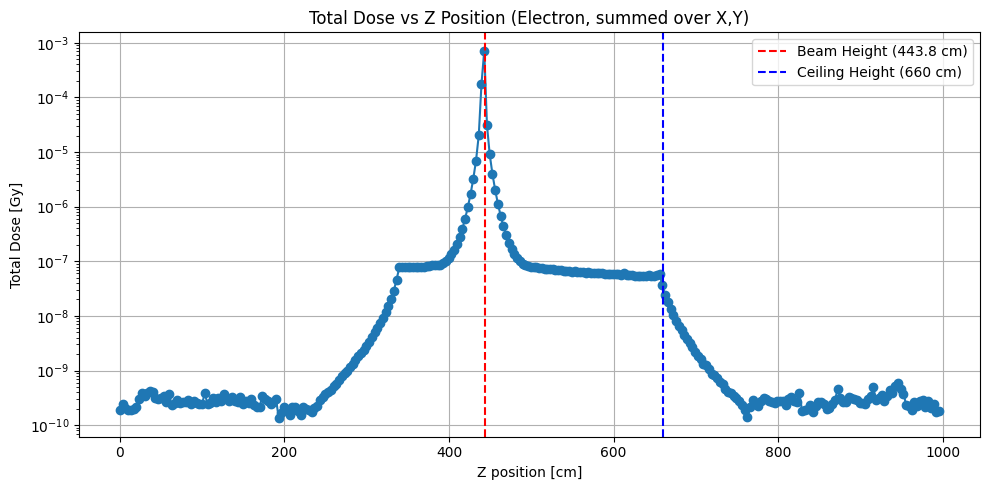

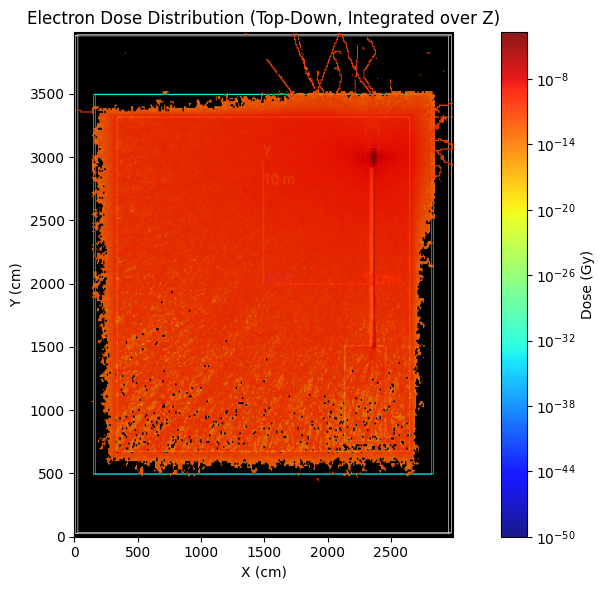

In [40]:
#Electron Dose Distribution
process_dose_file('filtered_output/dDepElectron.txt', '../../detector_overlay.png')

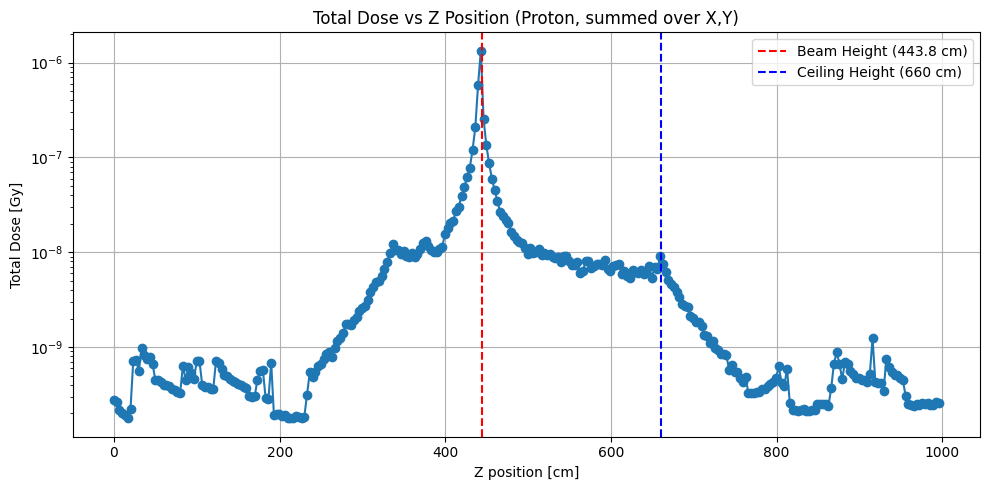

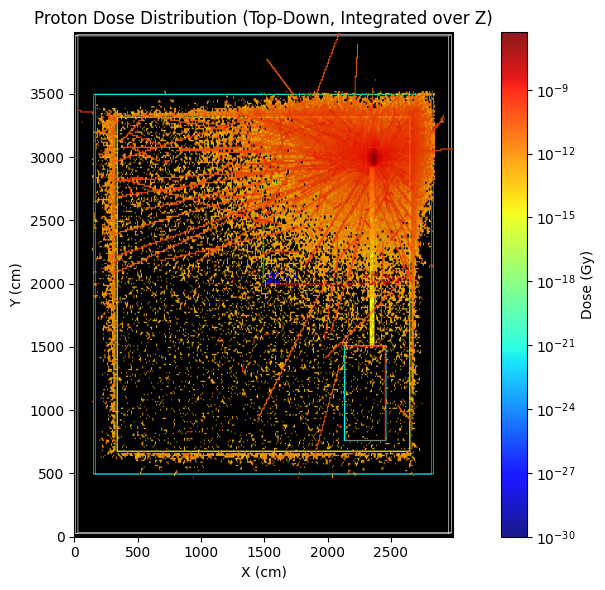

In [33]:
#Proton Dose Distribution
process_dose_file('filtered_output/dDepProton.txt', '../../detector_overlay.png')

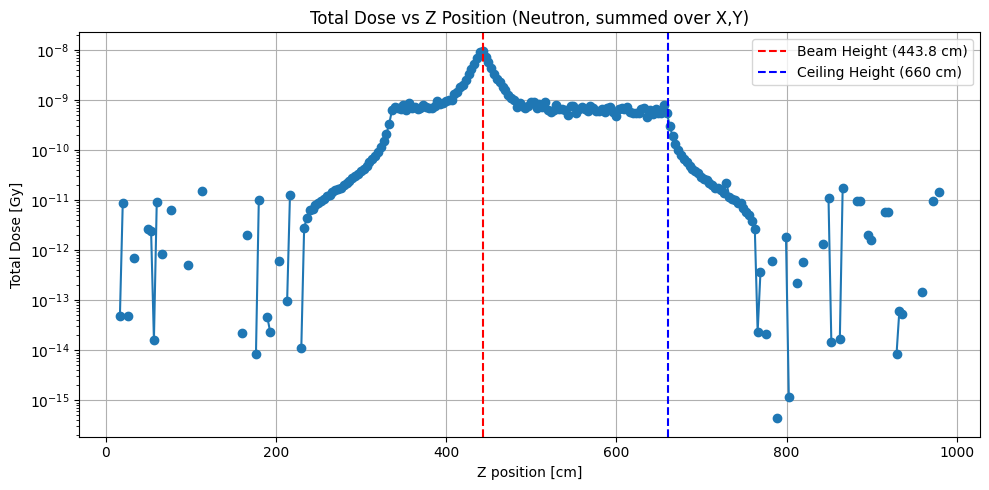

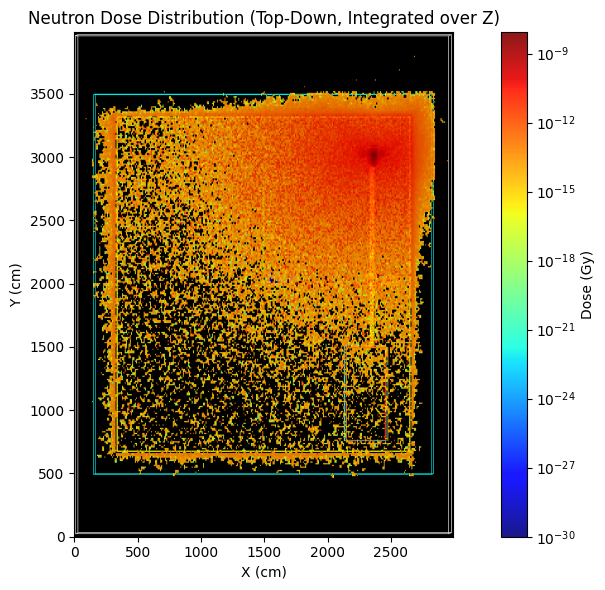

In [34]:
#Neutron Dose Distribution
process_dose_file('filtered_output/dDepNeutron.txt', '../../detector_overlay.png')

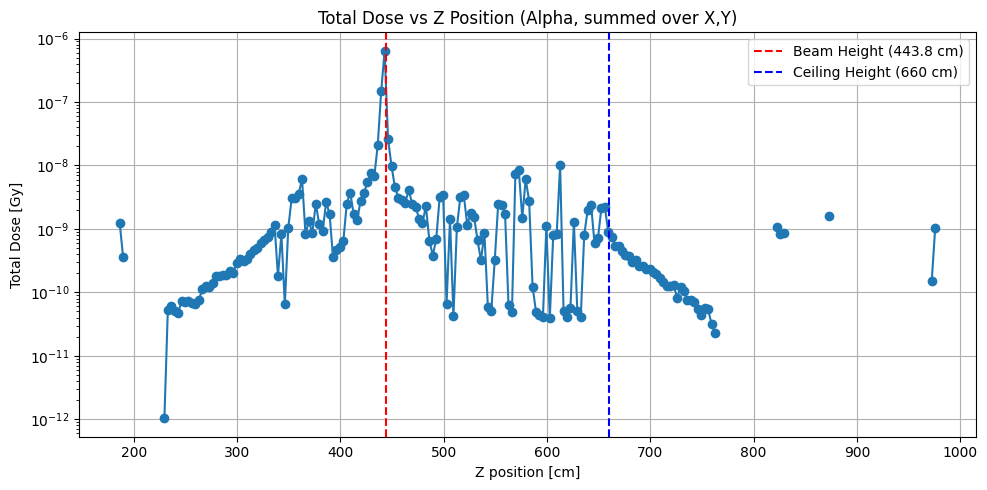

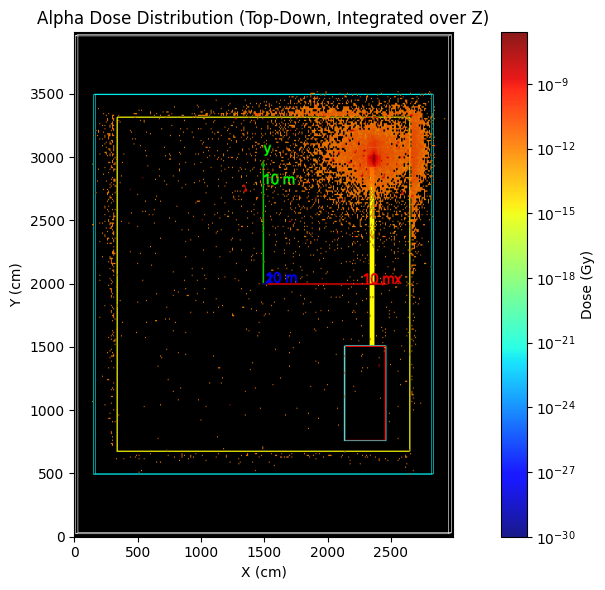

In [35]:
#Alpha Dose Distribution
process_dose_file('filtered_output/dDepAlpha.txt', '../../detector_overlay.png')

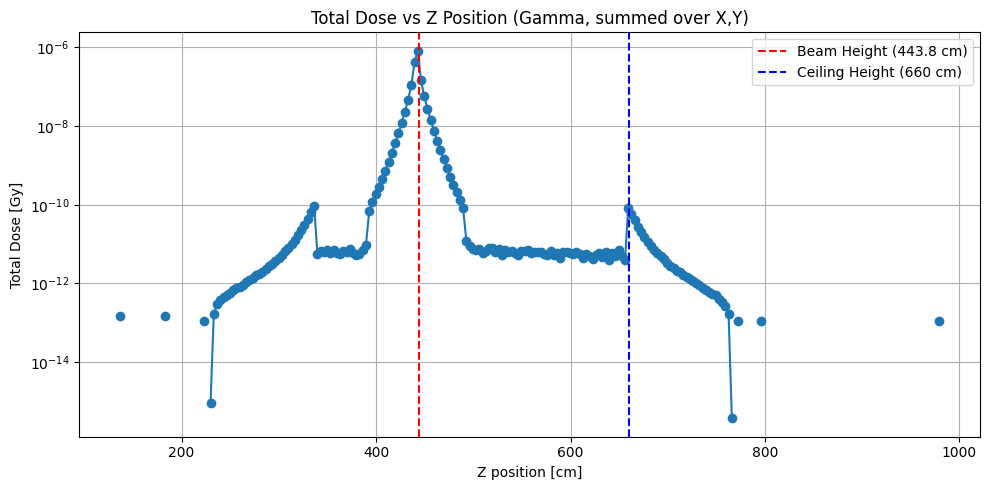

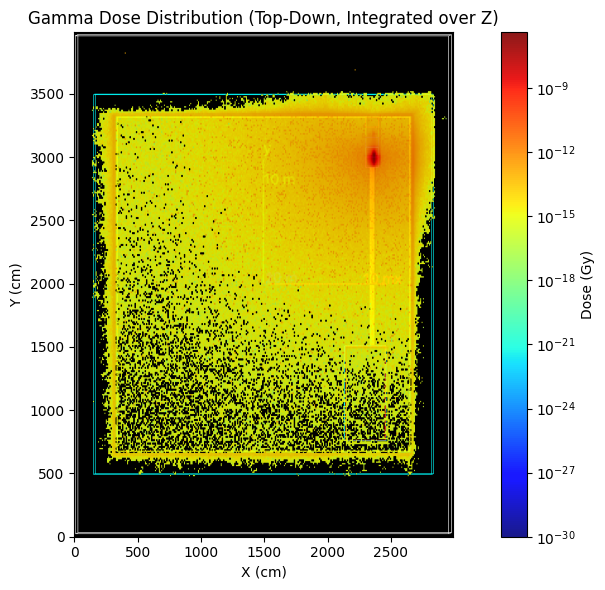

In [36]:
#Gamma Dose Distribution
process_dose_file('filtered_output/dDepGamma.txt', '../../detector_overlay.png')

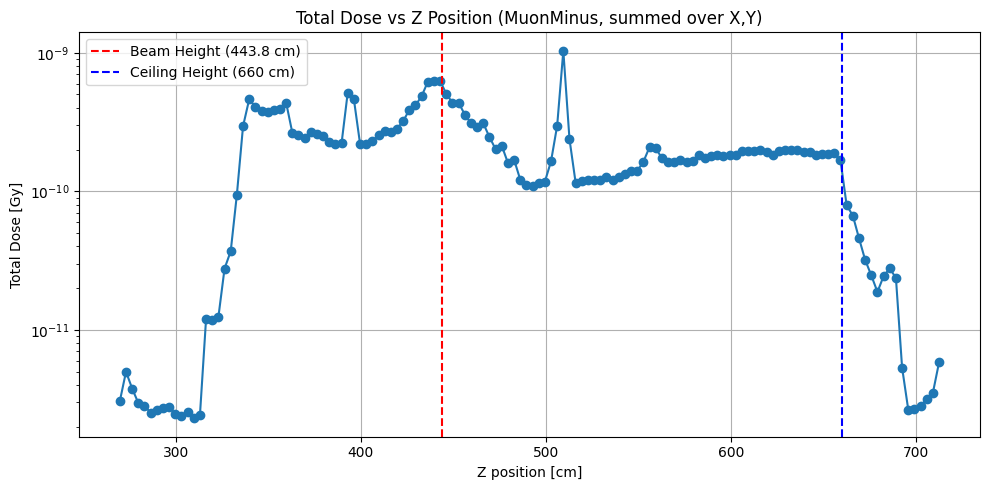

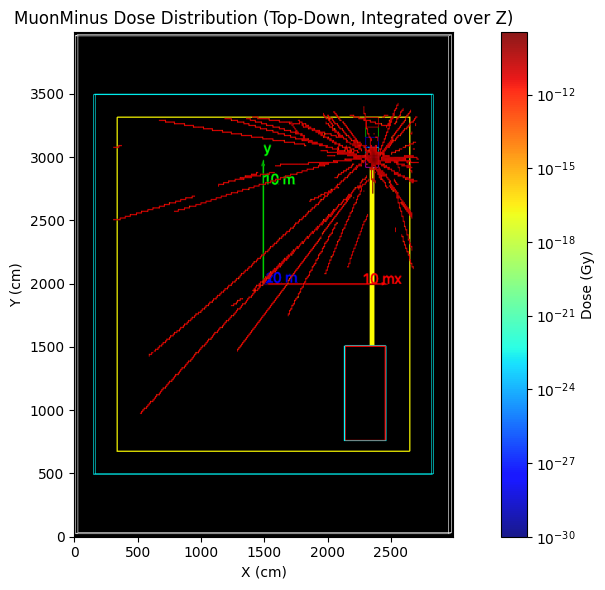

In [37]:
#Muon Minus Dose Distribution
process_dose_file('filtered_output/dDepMuonMinus.txt', '../../detector_overlay.png')

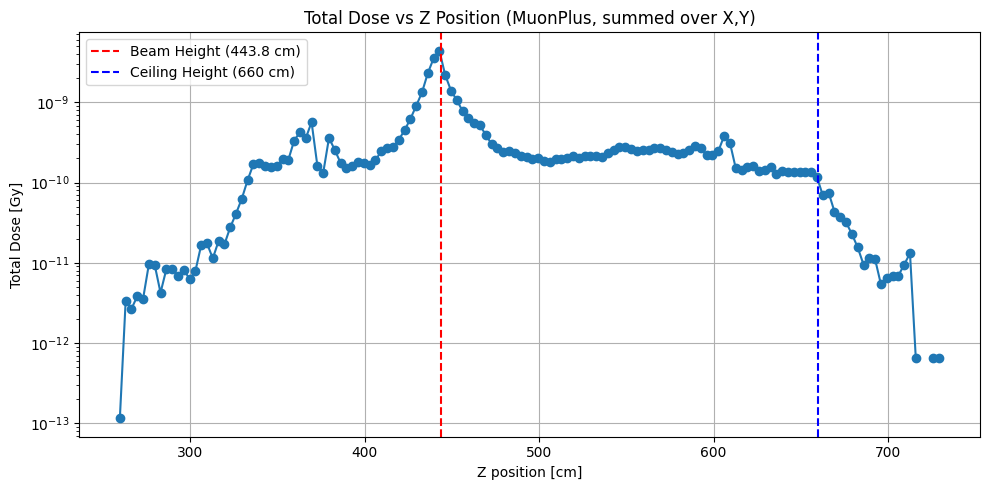

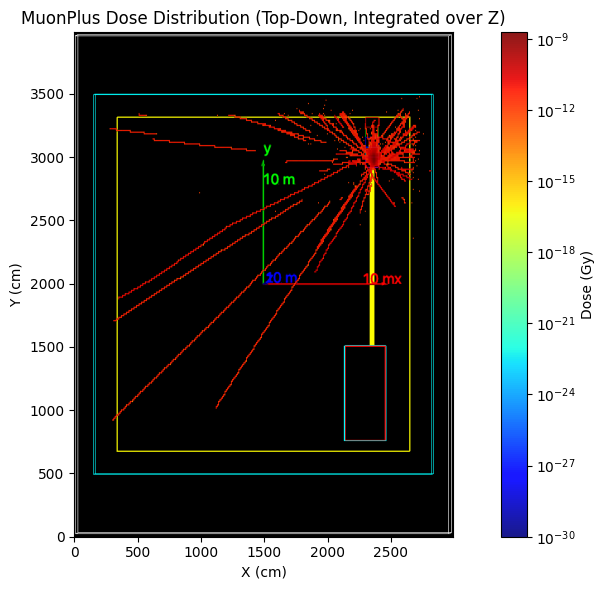

In [38]:
#Muon Plus Dose Distribution
process_dose_file('filtered_output/dDepMuonPlus.txt', '../../detector_overlay.png')